In [1]:
!pip install -U scikit-learn
!pip install scikeras[tensorflow]
!pip install pandas
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 69.2 MB/s eta 0:00:00a 0:00:01
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import os
import random

from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers import BatchNormalization

from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import LeaveOneGroupOut


In [11]:
random.seed(42) 
f = open('output.txt', 'w')

In [37]:

startdir = os.getcwd()
print(startdir)
os.chdir(startdir


/Users/vegy-math808y/Speciale/masters


In [38]:
path = '6'
os.chdir(startdir+'/data/afdb/dl'+path)
print(os.getcwd())

/Users/vegy-math808y/Speciale/masters/data/afdb/dl6


In [12]:

try:
    del X
    del y
    del ids
    del X_test
    del X_train
    del y_test
    del y_train
    del df_id
    del df_x
    del df_y
    print('Clear previously loaded data.')
except:
   pass

X = np.load("data/afdb/dl6/X_raw.npy")
y = np.load("data/afdb/dl6/y.npy")
ids = np.load("data/afdb/dl6/ids.npy")

In [5]:
%run setup.ipynb

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
float64
int64
[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
(1116465,)
(1116465, 1500)
(1116465, 2)
['08405', '04126', '04015', '05121', '05091', '08219', '04746', '08434', '06426', '06453', '08378', '04043', '05261', '04936', '08455', '06995']
['04048', '04908', '07162', '07859', '07879', '07910', '08215']
(780245, 1500, 1)
(336220, 1500, 1)


2023-02-13 11:08:34.378383: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-13 11:08:34.473122: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1621] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 31127 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:86:00.0, compute capability: 7.0


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnn_1 (LSTM)                (None, 1500, 128)         66560     
                                                                 
 dropout_1 (Dropout)         (None, 1500, 128)         0         
                                                                 
 rnn_2 (LSTM)                (None, 64)                49408     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                1300      
                                                                 
 dense_2 (Dense)             (None, 2)                 42        
                                                                 
Total params: 117,310
Trainable params: 117,310
Non-trai

2023-02-13 11:08:44.186770: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8700
2023-02-13 11:08:44.361193: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f6d887f0ee0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-13 11:08:44.361224: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2023-02-13 11:08:44.367522: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-02-13 11:08:44.522786: I tensorflow/compiler/jit/xla_compilation_cache.cc:480] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3048/3048 [==============================] - 482s 157ms/step - loss: 0.6469 - accuracy: 0.6340 - precision: 0.6340 - recall: 0.6341 - val_loss: 0.7555 - val_accuracy: 0.4351 - val_precision: 0.4354 - val_recall: 0.4372
Epoch 2/10
3048/3048 [==============================] - 475s 156ms/step - loss: 0.6553 - accuracy: 0.6228 - precision: 0.6227 - recall: 0.6227 - val_loss: 0.7564 - val_accuracy: 0.4146 - val_precision: 0.4056 - val_recall: 0.3902
Epoch 3/10
3048/3048 [==============================] - 475s 156ms/step - loss: 0.6305 - accuracy: 0.6542 - precision: 0.6534 - recall: 0.6523 - val_loss: 0.8604 - val_accuracy: 0.4120 - val_precision: 0.4120 - val_recall: 0.4120
Epoch 4/10
3048/3048 [==============================] - 475s 156ms/step - loss: 0.5416 - accuracy: 0.7453 - precision: 0.7454 - recall: 0.7446 - val_loss: 1.3513 - val_accuracy: 0.3551 - val_precision: 0.3552 - val_recall: 0.3553
Epoch 5/10
3048/3048 [==============================] - 480s 157ms/step - loss: 0.5938 - ac

In [6]:
f.close()

In [4]:
#%run setup.ipynb
print(os.getcwd())

/Users/vegy-math808y/Speciale/masters


In [4]:
##TWO-LAYERD LSTM for masters
lstm2 = keras.models.Sequential([
    keras.layers.LSTM(128, return_sequences=True, 
                      input_shape=[X_train.shape[1], X_train.shape[2]], name='rnn_1'),
    keras.layers.Dropout(rate = 0.2, name='dropout_1'),
    keras.layers.LSTM(64, return_sequences=False, name='rnn_2'),
    keras.layers.Dropout(rate = 0.2, name='dropout_2'),
    keras.layers.Dense(2,  name='dense_1'),
    keras.layers.Dense(2, activation='sigmoid', name='dense_2'),
    #keras.layers.Flatten()
])
lstm2.summary()


NameError: name 'X_train' is not defined

In [2]:
#oneHotEncode y
print(y[1:10])
encoder = OneHotEncoder(handle_unknown='ignore')
y = encoder.fit_transform(y).toarray()
print(y[1:10])

#transform y to int
print(y.dtype)
y = np.rint(y).astype(int)
print(y.dtype)
print(y[1:10])

#confirm that arrays are same length
print(np.shape(ids))   
print(np.shape(X))
print(np.shape(y))

#change into dataframe format to allow slicing method below
df_id = pd.DataFrame({'id':ids})
df_x = pd.DataFrame(X)
df_y = pd.DataFrame(y)

del X
del y

#redundant only to use if not entire notebook is run from start.
patients = ['04015','04043','04048','04126','04746','04908',
            '04936','05091','05121','05261','06426','06453','06995','07162',
            '07859','07879','07910','08215','08219','08378','08405','08434',
            '08455']

#make test and train split (16/7)
#change to use groupKsplit eventually
pts_train = random.sample(patients, 16)
pts_valid = [pt for pt in patients if pt not in pts_train]

print(pts_train)
print(pts_valid)

X_train = (df_x.loc[df_id.id.isin(pts_train)]).to_numpy()
X_valid = (df_x.loc[df_id.id.isin(pts_valid)]).to_numpy()
y_train = (df_y.loc[df_id.id.isin(pts_train)]).to_numpy()
y_valid = (df_y.loc[df_id.id.isin(pts_valid)]).to_numpy()

#reshape data: 
# reshape input to be [samples, time steps, features = 1]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))
#X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
float64
int64
[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
(1116465,)
(1116465, 1500)
(1116465, 2)
['08405', '04126', '04015', '05121', '05091', '08219', '04746', '08434', '06426', '06453', '08378', '04043', '05261', '04936', '08455', '06995']
['04048', '04908', '07162', '07859', '07879', '07910', '08215']


In [7]:
#models = [bilstm1, lstm1,dense, dlstm, cnn, cnnlstm, lstm2 ]
#modelname = ["bilstm1", "lstm1","dense", "dlstm", "cnn", "cnnlstm","lstm2"]

#models = [lstm2 ]
#modelname = ["lstm2"]

models = [(lstm2,"lstm2")]

#p=0
for model in models:
    
    model.compile(loss='binary_crossentropy',
        optimizer='adam', metrics = ['accuracy','Precision','Recall'])

    history = model[0].fit(
    X_train, y_train,    
    epochs=10,
    batch_size = 10,
    validation_data=(X_valid, y_valid),
    verbose=1)
    
    results = model[0].evaluate(X_valid, y_valid)
   
    f.write(model[1])
    f.write('\n')
    #p+=1

    for i, metric in enumerate(model[0].metrics_names):
        print('Final validation {}: {}'.format(metric,results[i]))
        f.write('Final validation {}: {}'.format(metric,results[i]))
        f.write('\n')

Epoch 1/10
 1066/78025 [..............................] - ETA: 48:51:22 - loss: 0.6768 - accuracy: 0.5915 - precision: 0.5910 - recall: 0.5953

KeyboardInterrupt: 

In [8]:

models = [lstm2]
modelname = ["lstm2"]

models = [(lstm2,"lstm2")]

def trainModel(model):    
    model[0].compile(loss='binary_crossentropy',
        optimizer='adam', metrics = ['accuracy','Precision','Recall'])

    
    history = model[0].fit(
    #X_train1[:10], y_train[:10],
    X_train1, y_train,    
    epochs=10,
    batch_size = 10,
    validation_data=(X_valid1, y_valid),
    verbose=1)
    
    results = model[0].evaluate(X_valid1, y_valid)
   
    f.write(model[1])
    f.write('\n')

    for i, metric in enumerate(model.metrics_names):
        print('Final validation {}: {}'.format(metric,results[i]))
        f.write('Final validation {}: {}'.format(metric,results[i]))
        f.write('\n')
        
for model in models:
    trainModel(model)


NameError: name 'X_train1' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

def create_model():
    model = Sequential()
    model.add(Conv1D(filters = 32, kernel_size = 5, activation = 'relu', input_shape = (X_train1.shape[1], X_train1.shape[2])))
    model.add(Dropout(rate = 0.25))
    model.add(Dense(1, activation = 'sigmoid'))
    return model

#model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy','Precision','Recall','AUC'])


model = KerasClassifier(model=create_model, loss='binary_crossentropy', optimizer="Adam", epochs=10, batch_size=10, verbose=1)
# define the grid search parameters

#learn_rate = np.logspace(-4, -2, 8)
learn_rate = [0.00001, 0.00005,0.0001, 0.0005, 0.001]
#dropout_rate = [0.1, 0.2, 0.25, 0.5]


#param_grid = dict(optimizer__learning_rate=learn_rate, model__dropout_rate=dropout_rate)
param_grid = dict(optimizer__learning_rate=learn_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=5)
grid_result = grid.fit(X_train1[:10000], y_train[:10000])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



In [32]:
from matplotlib import pyplot

def losscurve(historyv):
    loss = historyv.history['loss']
    val_loss = historyv.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.savefig("loss_curve")
    plt.legend()
    
    plt.show()

    
def acccurve(historyv):
    acc = historyv.history['accuracy']
    val_acc = historyv.history['val_accuracy']
    loss = historyv.history['loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, acc, 'y', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig("acc_curve")
    plt.show()

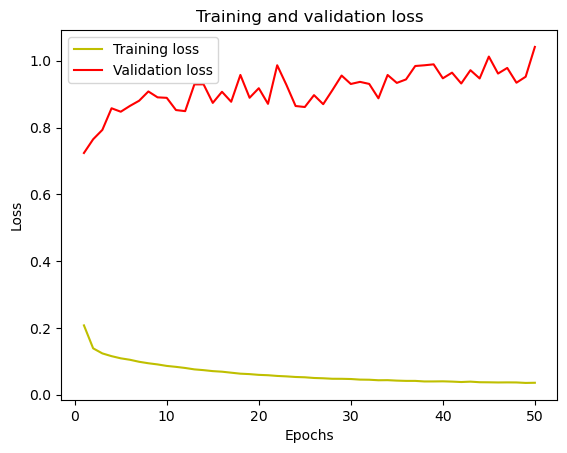

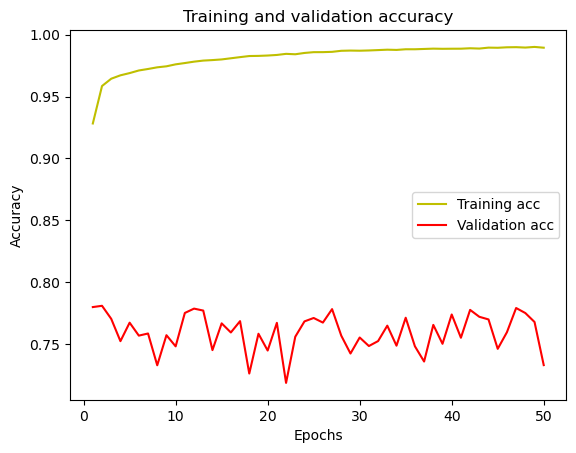

In [15]:
losscurve(history)

acccurve(history)

In [18]:
results = final.evaluate(X_valid1,y_valid)

for i, metric in enumerate(final.metrics_names):
  print('Final validation {}: {}'.format(metric,results[i]))

454/454 [==============================] - 3s 7ms/step - loss: 1.0414 - accuracy: 0.7330 - precision: 0.4580 - recall: 0.5685 - auc: 0.7288
Final validation loss: 1.0414159297943115
Final validation accuracy: 0.7330257296562195
Final validation precision: 0.4580082595348358
Final validation recall: 0.5684990286827087
Final validation auc: 0.7287615537643433


In [19]:
results = final.evaluate(X_test1,y_test)

for i, metric in enumerate(final.metrics_names):
  print('Final validation {}: {}'.format(metric,results[i]))



596/596 [==============================] - 4s 7ms/step - loss: 0.4377 - accuracy: 0.8501 - precision: 0.8133 - recall: 0.8331 - auc: 0.9188
Final validation loss: 0.43770238757133484
Final validation accuracy: 0.8500839471817017
Final validation precision: 0.8132876753807068
Final validation recall: 0.8330618143081665
Final validation auc: 0.9187813401222229


596/596 [==============================] - 3s 6ms/step


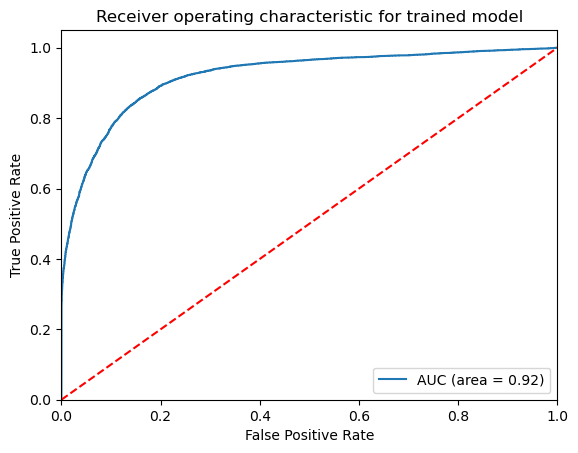

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, final.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, final.predict(X_test1))

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for trained model')
plt.legend(loc="lower right")
plt.savefig("roc_auc_final")
plt.show()

In [29]:
y_train_preds_final = final.predict(X_train1,verbose = 1)
y_valid_preds_final = final.predict(X_valid1,verbose = 1)
y_test_preds_final = final.predict(X_test1,verbose = 1)


#y_train_preds_final = (final.predict(x_test) > 0.5).astype("int32")

596/596 [==============================] - 4s 6ms/step


In [31]:
from sklearn.metrics import f1_score
f1_train = f1_score(y_train, y_train_preds_final)
f1_valid = f1_score(y_valid, y_valid_preds_final)
f1_test = f1_score(y_test, y_test_preds_final)
    

NameError: name 'y_train_preds_final' is not defined

# Cut below and insert potentially as separate setup file

In [3]:

#change into dataframe format to allow slicing method below
df_id = pd.DataFrame({'id':ids})
df_x = pd.DataFrame(X)
df_y = pd.DataFrame(y)

del X
del y

#redundant only to use if not entire notebook is run from start.
patients = ['04015','04043','04048','04126','04746','04908',
            '04936','05091','05121','05261','06426','06453','06995','07162',
            '07859','07879','07910','08215','08219','08378','08405','08434',
            '08455']

#make test and train split (16/7)
#change to use groupKsplit eventually
pts_train = random.sample(patients, 16)
pts_valid = [pt for pt in patients if pt not in pts_train]

print(pts_train)
print(pts_valid)

X_train = (df_x.loc[df_id.id.isin(pts_train)]).to_numpy()
X_valid = (df_x.loc[df_id.id.isin(pts_valid)]).to_numpy()
y_train = (df_y.loc[df_id.id.isin(pts_train)]).to_numpy()
y_valid = (df_y.loc[df_id.id.isin(pts_valid)]).to_numpy()

#reshape data: 
# reshape input to be [samples, time steps, features = 1]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))
#X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
float64
int64
[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
(1116465,)
(1116465, 1500)
(1116465, 2)
['06453', '08219', '07162', '04015', '08434', '05261', '08405', '07910', '08215', '07859', '04126', '08455', '06426', '05091', '04043', '05121']
['04048', '04746', '04908', '04936', '06995', '07879', '08378']
(766510, 1500, 1)
(349955, 1500, 1)


In [ ]:
##TWO-LAYERD LSTM for masters
lstm2 = keras.models.Sequential([
    keras.layers.LSTM(128, return_sequences=True, 
                      input_shape=[X_train.shape[1], X_train.shape[2]], name='rnn_1'),
    keras.layers.Dropout(rate = 0.2, name='dropout_1'),
    keras.layers.LSTM(64, return_sequences=False, name='rnn_2'),
    keras.layers.Dropout(rate = 0.2, name='dropout_2'),
    keras.layers.Dense(20,  name='dense_1'),
    keras.layers.Dense(2, activation='sigmoid', name='dense_2'),
    #keras.layers.Flatten()
])
lstm2.summary()


In [29]:
# https://www.sciencedirect.com/science/article/pii/S1746809420303323#fig0020

#workaround to be able to declare model prior to splitting data like in LOGO or CV.
X_train = np.zeros((3, X.shape[1],1))


combo = keras.models.Sequential([
    keras.layers.Conv1D(filters = 32, kernel_size = 5, activation = 'relu',
                        input_shape=[X_train.shape[1], X_train.shape[2]],name='conv1'),
    keras.layers.BatchNormalization(name='batch1'),
    keras.layers.MaxPooling1D(pool_size=2, strides=2, padding='same',name='max_pool1'),
    keras.layers.Conv1D(filters = 64 , kernel_size = 5, activation = 'relu',name='conv2'),
    keras.layers.BatchNormalization(name='batch2'),
    keras.layers.MaxPooling1D(pool_size=2, strides=2, padding='same',name='max_pool2'),
    keras.layers.Conv1D(filters = 32 , kernel_size = 5, activation = 'relu',name='conv3'),
    keras.layers.BatchNormalization(name='batch3'),
    keras.layers.MaxPooling1D(pool_size=2, strides=2, padding='same',name='max_pool3' ),
    keras.layers.LSTM(64, return_sequences=False, name='LSTM'), 
    keras.layers.Dense(128,  name='dense_1'),
    keras.layers.Dense(2, activation='sigmoid', name='dense_2'),
    
])
                              
combo.summary()

#use? https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryFocalCrossentropy

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv1D)              (None, 1496, 32)          192       
                                                                 
 batch1 (BatchNormalization)  (None, 1496, 32)         128       
                                                                 
 max_pool1 (MaxPooling1D)    (None, 748, 32)           0         
                                                                 
 conv2 (Conv1D)              (None, 744, 64)           10304     
                                                                 
 batch2 (BatchNormalization)  (None, 744, 64)          256       
                                                                 
 max_pool2 (MaxPooling1D)    (None, 372, 64)           0         
                                                                 
 conv3 (Conv1D)              (None, 368, 32)         

In [28]:
X_train = np.zeros((3, X.shape[1],1))
print(X_train.shape[1])
print(X_train.shape[2])

1500
1


In [14]:
#models = [bilstm1, lstm1,dense, dlstm, cnn, cnnlstm, lstm2 ]
#modelname = ["bilstm1", "lstm1","dense", "dlstm", "cnn", "cnnlstm","lstm2"]

#models = [lstm2 ]
#modelname = ["lstm2"]

#models = [(lstm2,"lstm2")]
models = [(combo,"combo")]


#p=0
for model in models:
    
    model[0].compile(loss='binary_crossentropy',
        optimizer='adam', metrics = ['accuracy','Precision','Recall'])
    history = model[0].fit(X_train[:100], y_train[:100],    
    epochs=10,
    batch_size = 64,
    validation_data=(X_valid[:100], y_valid[:100]),
    verbose=1)
    
    results = model[0].evaluate(X_valid[:100], y_valid[:100])
   
    f.write(model[1])
    f.write('\n')
    #p+=1

    for i, metric in enumerate(model[0].metrics_names):
        print('Final validation {}: {}'.format(metric,results[i]))
        f.write('Final validation {}: {}'.format(metric,results[i]))
        f.write('\n')

Epoch 1/10
2/2 [==============================] - 5s 2s/step - loss: 0.0035 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
2/2 [==============================] - 1s 432ms/step - loss: 7.4918e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 7.7400e-04 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 451ms/step - loss: 2.4004e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.1748e-04 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 425ms/step - loss: 9.5663e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 8.7254e-05 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 399ms/step - loss: 4.3567e-05 - accura

In [26]:
#oneHotEncode y
print(y[1:10])
encoder = OneHotEncoder(handle_unknown='ignore')
y = encoder.fit_transform(y).toarray()

#transform y to int

print(y.dtype)
y = np.rint(y).astype(int)
print(y.dtype)
print(y[1:10])

#confirm that arrays are same length
print(np.shape(ids))   
print(np.shape(X))
print(np.shape(y))

# reshape input to be [samples, time steps, features = 1]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
float64
int64
[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
(1116465,)
(1116465, 1500)
(1116465, 2)


44000
1116464
################################
0
43999
(1116464, 1500, 1)
shape of y: (1116464, 2), type of y: <class 'numpy.ndarray'>
shape of x: (1116464, 1500, 1), type of y: <class 'numpy.ndarray'>
Epoch 1/10
2/2 [==============================] - 7s 1s/step - loss: 3.2208e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 4.4785e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
2/2 [==============================] - 1s 391ms/step - loss: 3.2111e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 4.4635e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 396ms/step - loss: 3.1747e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 4.4422e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 392ms/step - loss: 3.1829e-08 - accuracy: 1.0000 - precisi

/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:20: RuntimeWarning: invalid value encountered in long_scalars
  tpr= tp/(fn+tp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)
/Users/vegy-math808y/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2/2 [==============================] - 4s 1s/step - loss: 2.9491e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 4.1355e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
2/2 [==============================] - 1s 507ms/step - loss: 2.9267e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 4.1234e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 564ms/step - loss: 2.9137e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 4.1064e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 519ms/step - loss: 2.9063e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 4.0858e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 483ms/step - loss: 2.8908e-08 - accuracy:

/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:20: RuntimeWarning: invalid value encountered in long_scalars
  tpr= tp/(fn+tp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)
/Users/vegy-math808y/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2/2 [==============================] - 4s 1s/step - loss: 2.7271e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 4.0073e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
2/2 [==============================] - 1s 421ms/step - loss: 2.7373e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 4.0025e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 385ms/step - loss: 2.7120e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.9933e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 526ms/step - loss: 2.6939e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.9810e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 511ms/step - loss: 2.6796e-08 - accuracy:

/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:20: RuntimeWarning: invalid value encountered in long_scalars
  tpr= tp/(fn+tp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)
/Users/vegy-math808y/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2/2 [==============================] - 5s 1s/step - loss: 2.5652e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 7.3806 - val_accuracy: 0.5700 - val_precision: 0.5700 - val_recall: 0.5700
Epoch 2/10
2/2 [==============================] - 1s 419ms/step - loss: 2.5531e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 7.3824 - val_accuracy: 0.5700 - val_precision: 0.5700 - val_recall: 0.5700
Epoch 3/10
2/2 [==============================] - 1s 431ms/step - loss: 2.5531e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 7.3844 - val_accuracy: 0.5700 - val_precision: 0.5700 - val_recall: 0.5700
Epoch 4/10
2/2 [==============================] - 1s 620ms/step - loss: 2.5373e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 7.3869 - val_accuracy: 0.5700 - val_precision: 0.5700 - val_recall: 0.5700
Epoch 5/10
2/2 [==============================] - 1s 584ms/step - loss: 2.5229e-08 - accuracy: 1.0000 - precis

/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)


2/2 [==============================] - 5s 1s/step - loss: 2.4225e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.3203e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
2/2 [==============================] - 1s 401ms/step - loss: 2.4350e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.3119e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 396ms/step - loss: 2.4079e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.3012e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 391ms/step - loss: 2.4034e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.2880e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 394ms/step - loss: 2.3866e-08 - accuracy:

/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:20: RuntimeWarning: invalid value encountered in long_scalars
  tpr= tp/(fn+tp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)
/Users/vegy-math808y/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2/2 [==============================] - 6s 1s/step - loss: 2.3042e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.8200e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
2/2 [==============================] - 1s 404ms/step - loss: 2.3015e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.8093e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 399ms/step - loss: 2.2863e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.7970e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 433ms/step - loss: 2.2918e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.7827e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 443ms/step - loss: 2.2755e-08 - accuracy:

/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:20: RuntimeWarning: invalid value encountered in long_scalars
  tpr= tp/(fn+tp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)
/Users/vegy-math808y/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2/2 [==============================] - 4s 1s/step - loss: 2.1820e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.7697e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
2/2 [==============================] - 1s 464ms/step - loss: 2.1977e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.7591e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 423ms/step - loss: 2.1908e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.7466e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 397ms/step - loss: 2.1788e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.7328e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 413ms/step - loss: 2.1600e-08 - accuracy:

/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:20: RuntimeWarning: invalid value encountered in long_scalars
  tpr= tp/(fn+tp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)
/Users/vegy-math808y/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2/2 [==============================] - 5s 1s/step - loss: 2.1145e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.6069e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
2/2 [==============================] - 1s 445ms/step - loss: 2.0997e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.5959e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 403ms/step - loss: 2.0947e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.5833e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 441ms/step - loss: 2.0923e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.5696e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 612ms/step - loss: 2.0842e-08 - accuracy:

/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:20: RuntimeWarning: invalid value encountered in long_scalars
  tpr= tp/(fn+tp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)
/Users/vegy-math808y/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2/2 [==============================] - 5s 2s/step - loss: 2.0177e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.5307e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
2/2 [==============================] - 1s 431ms/step - loss: 2.0178e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.5228e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 404ms/step - loss: 2.0090e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.5137e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 580ms/step - loss: 2.0132e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.5035e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 547ms/step - loss: 1.9843e-08 - accuracy:

/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:20: RuntimeWarning: invalid value encountered in long_scalars
  tpr= tp/(fn+tp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)
/Users/vegy-math808y/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2/2 [==============================] - 5s 1s/step - loss: 1.9452e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.4216e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
2/2 [==============================] - 1s 397ms/step - loss: 1.9348e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.4095e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 397ms/step - loss: 1.9300e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.3961e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 398ms/step - loss: 1.9300e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.3817e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 384ms/step - loss: 1.9331e-08 - accuracy:

/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:20: RuntimeWarning: invalid value encountered in long_scalars
  tpr= tp/(fn+tp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)
/Users/vegy-math808y/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2/2 [==============================] - 4s 1s/step - loss: 1.8805e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 17.6681 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 1s 431ms/step - loss: 1.8763e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 17.6727 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 1s 461ms/step - loss: 1.8670e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 17.6778 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 1s 448ms/step - loss: 1.8665e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 17.6833 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 1s 417ms

/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:22: RuntimeWarning: invalid value encountered in long_scalars
  tnr = tn/(tn+fp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:26: RuntimeWarning: invalid value encountered in long_scalars
  fpr = fp/(tn+fp)


2/2 [==============================] - 4s 1s/step - loss: 1.8150e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.3449e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
2/2 [==============================] - 1s 403ms/step - loss: 1.8179e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.3353e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 407ms/step - loss: 1.8124e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.3246e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 431ms/step - loss: 1.8021e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.3129e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 417ms/step - loss: 1.7999e-08 - accuracy:

/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:20: RuntimeWarning: invalid value encountered in long_scalars
  tpr= tp/(fn+tp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)
/Users/vegy-math808y/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2/2 [==============================] - 5s 1s/step - loss: 1.7585e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 17.5755 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 1s 437ms/step - loss: 1.7561e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 17.5805 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 1s 473ms/step - loss: 1.7548e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 17.5860 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 1s 440ms/step - loss: 1.7328e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 17.5917 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 1s 530ms

/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:22: RuntimeWarning: invalid value encountered in long_scalars
  tnr = tn/(tn+fp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:26: RuntimeWarning: invalid value encountered in long_scalars
  fpr = fp/(tn+fp)


2/2 [==============================] - 5s 1s/step - loss: 1.7065e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 17.5772 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 1s 452ms/step - loss: 1.6950e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 17.5810 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 1s 418ms/step - loss: 1.7002e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 17.5855 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 1s 461ms/step - loss: 1.7017e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 17.5906 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 1s 536ms

/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:22: RuntimeWarning: invalid value encountered in long_scalars
  tnr = tn/(tn+fp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:26: RuntimeWarning: invalid value encountered in long_scalars
  fpr = fp/(tn+fp)


2/2 [==============================] - 5s 1s/step - loss: 1.6567e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 17.9312 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 1s 469ms/step - loss: 1.6552e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 17.9373 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 1s 460ms/step - loss: 1.6512e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 17.9437 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 1s 473ms/step - loss: 1.6511e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 17.9504 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 1s 494ms

/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:22: RuntimeWarning: invalid value encountered in long_scalars
  tnr = tn/(tn+fp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:26: RuntimeWarning: invalid value encountered in long_scalars
  fpr = fp/(tn+fp)


2/2 [==============================] - 6s 2s/step - loss: 1.6073e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.2212e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
2/2 [==============================] - 1s 434ms/step - loss: 1.6065e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.2126e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 400ms/step - loss: 1.6040e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.2032e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 403ms/step - loss: 1.6062e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.1931e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 414ms/step - loss: 1.5899e-08 - accuracy:

/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:20: RuntimeWarning: invalid value encountered in long_scalars
  tpr= tp/(fn+tp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)
/Users/vegy-math808y/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2/2 [==============================] - 5s 1s/step - loss: 1.5666e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.3838e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
2/2 [==============================] - 1s 489ms/step - loss: 1.5653e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.3751e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 409ms/step - loss: 1.5591e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.3653e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 439ms/step - loss: 1.5599e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.3553e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 415ms/step - loss: 1.5553e-08 - accuracy:

/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:20: RuntimeWarning: invalid value encountered in long_scalars
  tpr= tp/(fn+tp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)
/Users/vegy-math808y/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2/2 [==============================] - 5s 1s/step - loss: 1.5221e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.7687e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
2/2 [==============================] - 1s 490ms/step - loss: 1.5187e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.7607e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 447ms/step - loss: 1.5218e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.7523e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 484ms/step - loss: 1.5170e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.7435e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 497ms/step - loss: 1.5119e-08 - accuracy:

/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:20: RuntimeWarning: invalid value encountered in long_scalars
  tpr= tp/(fn+tp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)
/Users/vegy-math808y/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2/2 [==============================] - 5s 1s/step - loss: 1.4873e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.5473e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
2/2 [==============================] - 1s 465ms/step - loss: 1.4909e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.5600e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 433ms/step - loss: 1.4873e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.5713e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 457ms/step - loss: 1.4805e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.5804e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 459ms/step - loss: 1.4739e-08 - accuracy:

/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:20: RuntimeWarning: invalid value encountered in long_scalars
  tpr= tp/(fn+tp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)
/Users/vegy-math808y/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2/2 [==============================] - 6s 1s/step - loss: 1.4503e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.9583e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
2/2 [==============================] - 1s 471ms/step - loss: 1.4506e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.9579e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 506ms/step - loss: 1.4505e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.9570e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 449ms/step - loss: 1.4427e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.9557e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 418ms/step - loss: 1.4433e-08 - accuracy:

/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:20: RuntimeWarning: invalid value encountered in long_scalars
  tpr= tp/(fn+tp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)
/Users/vegy-math808y/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2/2 [==============================] - 5s 1s/step - loss: 1.4201e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.0964e-07 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
2/2 [==============================] - 1s 408ms/step - loss: 1.4184e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.0966e-07 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 459ms/step - loss: 1.4153e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.1019e-07 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 498ms/step - loss: 1.4073e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.1110e-07 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 515ms/step - loss: 1.4083e-08 - accuracy:

/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:20: RuntimeWarning: invalid value encountered in long_scalars
  tpr= tp/(fn+tp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)
/Users/vegy-math808y/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2/2 [==============================] - 5s 1s/step - loss: 1.3930e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.2389e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
2/2 [==============================] - 1s 492ms/step - loss: 1.3922e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.2349e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 475ms/step - loss: 1.3911e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.2306e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 432ms/step - loss: 1.3829e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.2259e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 523ms/step - loss: 1.3755e-08 - accuracy:

/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:20: RuntimeWarning: invalid value encountered in long_scalars
  tpr= tp/(fn+tp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)
/Users/vegy-math808y/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2/2 [==============================] - 5s 1s/step - loss: 1.3591e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.9349e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
2/2 [==============================] - 1s 488ms/step - loss: 1.3600e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.9376e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 599ms/step - loss: 1.3676e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.9399e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 422ms/step - loss: 1.3591e-08 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.9410e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 431ms/step - loss: 1.3574e-08 - accuracy:

/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:20: RuntimeWarning: invalid value encountered in long_scalars
  tpr= tp/(fn+tp)
/var/folders/tm/zzwcfn_x7bd81z1rrf1v2dyd_lzzjj/T/ipykernel_3164/4117077493.py:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)
/Users/vegy-math808y/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


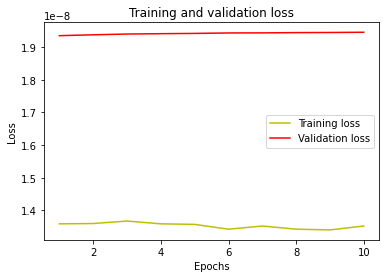

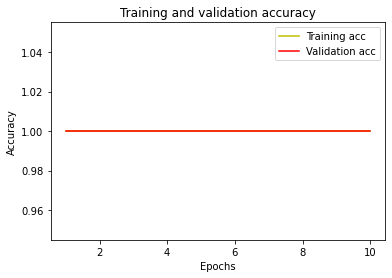

In [33]:
def evaluate(X_test,y_test, model, modelname):
    #acc = model.score(X_test, y_test)
    #results = model.evaluate(X_test, y_test)
    #acc_r = results[1]
    #print(acc_r)
    y_pred_pr = model.predict(X_test)
    y_pred_cl = np.argmax(y_pred_pr, axis=1)
    print(y_pred_pr[:10])
    y_pred_pr = y_pred_pr[:,0]
    print(y_pred_pr[:10])
    
    
    print(y_pred_cl[:10])   
    #y_pred = np.argmax(y_pred, axis=1)
    
    y_test = np.argmax(y_test, axis=1)
          
    tn, fp, fn, tp = confusion_matrix(list(y_test), list(y_pred_cl), labels=[0, 1]).ravel()
    #Sensitivity/Recall/TPR
    tpr= tp/(fn+tp)
    #Specificity/TNR
    tnr = tn/(tn+fp)
    #Precision/Positive Predictive value
    prec = tp/(tp+fp)
    #FPR
    fpr = fp/(tn+fp)
    #Accuracy
    acc = (tp+tn)/(tp+tn+fp+fn)
    try:
        roc_auc = roc_auc_score(y_test, y_pred_pr)
    except ValueError:
        #pass
        roc_auc = 2
    
    f1 = f1_score(y_test, y_pred_cl)


    toappend = pd.DataFrame({'model': [modelname] ,'acc':[acc], 'tpr':[tpr], 'tnr':[tnr], 'prec':[prec],'fpr':[fpr], 'roc_auc':[roc_auc], 'f1':[f1]}, 
                           columns=['model','acc', 'tpr', 'tnr', 'prec','fpr','roc_auc','f1'])
    
    return toappend





metrics = pd.DataFrame({'model':[],'acc':[], 'tpr':[], 'tnr':[], 'prec':[], 'fpr':[], 'roc_auc':[], 'f1':[]},
                    columns=['model','acc', 'tpr', 'tnr', 'prec','fpr','roc_auc','f1'])

logo = LeaveOneGroupOut()
logo.get_n_splits(groups=ids)

for train_index, test_index in logo.split(X, y, ids):
    #print(datetime.datetime.now())
    print(train_index[0])
    print(train_index[-1]) 

    print('################################')
    print(test_index[0])
    print(test_index[-1])
      
    X_train, X_test = X[:train_index[-1]], X[test_index[0]:]
    y_train, y_test = y[:train_index[-1]], y[test_index[0]:]
    
    #y_train_all.append(y_train)
    #y_test_all.append(y_test)
    print(X_train.shape)
    print(f"shape of y: {np.shape(y_train)}, type of y: {type(y_train)}")
    print(f"shape of x: {np.shape(X_train)}, type of y: {type(y_train)}")
  
    combo.compile(loss='binary_crossentropy',
        optimizer='adam', metrics = ['accuracy','Precision','Recall'])
    
    history = combo.fit(X_train[:100], y_train[:100],    
                epochs=10,
                batch_size = 64,
                validation_data=(X_test[:100], y_test[:100]),
                verbose=1)
    print("fitted")
        
    toappend = evaluate(X_test[:100],y_test[:100], combo, "combo")
        
    metrics = pd.concat([metrics, toappend])
    print("appended metrics")

losscurve(history)
acccurve(history)
metrics.to_pickle('metrics')
    


In [34]:
pd.read_pickle('metrics')

,model,acc,tpr,tnr,prec,fpr,roc_auc,f1
0,combo,1.00,NaN,1.0,NaN,0.0,2.000000,0.0
0,combo,1.00,NaN,1.0,NaN,0.0,2.000000,0.0
0,combo,1.00,NaN,1.0,NaN,0.0,2.000000,0.0
0,combo,0.57,0.0,1.0,NaN,0.0,0.501428,0.0
0,combo,1.00,NaN,1.0,NaN,0.0,2.000000,0.0
0,combo,1.00,NaN,1.0,NaN,0.0,2.000000,0.0
0,combo,1.00,NaN,1.0,NaN,0.0,2.000000,0.0
0,combo,1.00,NaN,1.0,NaN,0.0,2.000000,0.0
0,combo,1.00,NaN,1.0,NaN,0.0,2.000000,0.0
0,combo,1.00,NaN,1.0,NaN,0.0,2.000000,0.0


In [35]:
def evaluate(X_test,y_test, model, modelname):
    #acc = model.score(X_test, y_test)
    #results = model.evaluate(X_test, y_test)
    #acc_r = results[1]
    #print(acc_r)
    y_pred_pr = model.predict(X_test)
    y_pred_cl = np.argmax(y_pred_pr, axis=1)
    print(y_pred_pr[:10])
    y_pred_pr = y_pred_pr[:,0]
    print(y_pred_pr[:10])
    
    
    print(y_pred_cl[:10])   
    #y_pred = np.argmax(y_pred, axis=1)
    
    y_test = np.argmax(y_test, axis=1)
          
    tn, fp, fn, tp = confusion_matrix(list(y_test), list(y_pred_cl), labels=[0, 1]).ravel()
    #Sensitivity/Recall/TPR
    tpr= tp/(fn+tp)
    #Specificity/TNR
    tnr = tn/(tn+fp)
    #Precision/Positive Predictive value
    prec = tp/(tp+fp)
    #FPR
    fpr = fp/(tn+fp)
    #Accuracy
    acc = (tp+tn)/(tp+tn+fp+fn)
    try:
        roc_auc = roc_auc_score(y_test, y_pred_pr)
    except ValueError:
        #pass
        roc_auc = 2
    
    f1 = f1_score(y_test, y_pred_cl)


    toappend = pd.DataFrame({'model': [modelname] ,'acc':[acc], 'tpr':[tpr], 'tnr':[tnr], 'prec':[prec],'fpr':[fpr], 'roc_auc':[roc_auc], 'f1':[f1]}, 
                           columns=['model','acc', 'tpr', 'tnr', 'prec','fpr','roc_auc','f1'])
    
    return toappend


def logoloop():

    metrics = pd.DataFrame({'model':[],'acc':[], 'tpr':[], 'tnr':[], 'prec':[], 'fpr':[], 'roc_auc':[], 'f1':[]},
                        columns=['model','acc', 'tpr', 'tnr', 'prec','fpr','roc_auc','f1'])

    logo = LeaveOneGroupOut()
    logo.get_n_splits(groups=ids)

    for train_index, test_index in logo.split(X, y, ids):
        #print(datetime.datetime.now())
        print(train_index[0])
        print(train_index[-1]) 

        print('################################')
        print(test_index[0])
        print(test_index[-1])

        X_train, X_test = X[:train_index[-1]], X[test_index[0]:]
        y_train, y_test = y[:train_index[-1]], y[test_index[0]:]

        #y_train_all.append(y_train)
        #y_test_all.append(y_test)
        print(X_train.shape)
        print(f"shape of y: {np.shape(y_train)}, type of y: {type(y_train)}")
        print(f"shape of x: {np.shape(X_train)}, type of y: {type(y_train)}")

        combo.compile(loss='binary_crossentropy',
            optimizer='adam', metrics = ['accuracy','Precision','Recall'])

        history = combo.fit(X_train[:100], y_train[:100],    
                    epochs=10,
                    batch_size = 64,
                    validation_data=(X_test[:100], y_test[:100]),
                    verbose=1)
        print("fitted")

        toappend = evaluate(X_test[:100],y_test[:100], combo, "combo")

        metrics = pd.concat([metrics, toappend])
        print("appended metrics")

    losscurve(history)
    acccurve(history)
    metrics.to_pickle('metrics')


In [ ]:
from sklearn.model_selection import GroupShuffleSplit

def split_train_eval(model):

    metrics = pd.DataFrame({'model':[],'acc':[], 'tpr':[], 'tnr':[], 'prec':[], 'fpr':[], 'roc_auc':[], 'f1':[]},
                        columns=['model','acc', 'tpr', 'tnr', 'prec','fpr','roc_auc','f1'])

    gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
    train_index, test_index = gss.split(X, y, ids):

    #itemgetter use    
    
    X_train =
    X_test =
    y_train =
    y_test =
    
    print(f"shape of x_train: {np.shape(X_train)}, type: {type(X_train)}")
    print(f"shape of x_test: {np.shape(X_test)}, type: {type(X_test)}")

    model.compile(loss='binary_crossentropy',
        optimizer='adam', metrics = ['accuracy','Precision','Recall'])

    history = model.fit(X_train, y_train,    
                epochs=20,
                batch_size = 64,
                validation_data=(X_test, y_test),
                verbose=1)
    print("fitted")

    toappend = evaluate(X_test,y_test, model, "modelname")

    metrics = pd.concat([metrics, toappend])
    print("appended metrics")

    losscurve(history)
    acccurve(history)
    metrics.to_pickle('metrics')


## define model as function to be able to wrap in kerasClassifier for gridsearchCV

In [8]:
def create_combo():
    model = Sequential()
    model.add(Conv1D(filters = 32, kernel_size = 5, activation = 'relu',
                        input_shape=[X_train.shape[1], X_train.shape[2]],name='conv1')
    model.add(BatchNormalization(name='batch1')
    model.add(MaxPooling1D(pool_size=2, strides=2, padding='same',name='max_pool1')
    model.add(Conv1D(filters = 64 , kernel_size = 5, activation = 'relu',name='conv2')
    model.add(BatchNormalization(name='batch2')
    model.add(MaxPooling1D(pool_size=2, strides=2, padding='same',name='max_pool2')
    model.add(Conv1D(filters = 32 , kernel_size = 5, activation = 'relu',name='conv3')
    model.add(BatchNormalization(name='batch3')
    model.add(MaxPooling1D(pool_size=2, strides=2, padding='same',name='max_pool3' )
    model.add(LSTM(64, return_sequences=False, name='LSTM')
    model.add(Dense(128,  name='dense_1')
    model.add(keras.layers.Dense(2, activation='sigmoid', name='dense_2')
              
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=opt, 
                  metrics=['accuracy','Precision','Recall'])
    
    return model
              

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

## something like this for gridsearch (NB: need to define variable to pass to model i function definition 

model = KerasClassifier(model=create_model, loss="categorical_crossentropy", optimizer="Adam", epochs=10, batch_size=10, verbose=1)
#### define the grid search parameters

#neurons = [1,2,3,4,8]
activation = ['relu', 'leaky_relu', 'softmax', 'sigmoid']
#param_grid = dict(model__neurons=neurons, model__activation=activation)
param_grid = dict(model__activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=5)
grid_result = grid.fit(X_train1[:10000], y_train[:10000])
#### summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


In [ ]:
#redundant only to use if not entire notebook is run from start.
patients = ['04015','04043','04048','04126','04746','04908',
            '04936','05091','05121','05261','06426','06453','06995','07162',
            '07859','07879','07910','08215','08219','08378','08405','08434',
            '08455']

def makesplit():

#Change to dataframe to allow for slicing below
ids = pd.DataFrame({'id':ids})
X = pd.DataFrame(X)
y = pd.DataFrame(y)

#make test and train split (16/7)
#change to use groupKsplit eventually
pts_train = random.sample(patients, 16)
pts_valid = [pt for pt in patients if pt not in pts_train]

print(pts_train)
print(pts_valid)

X_train = (X.loc[ids.id.isin(pts_train)]).to_numpy()
X_valid = (X.loc[ids.id.isin(pts_valid)]).to_numpy()
y_train = (y.loc[ids.id.isin(pts_train)]).to_numpy()
y_valid = (y.loc[ids.id.isin(pts_valid)]).to_numpy()

#reshape data: 
# reshape input to be [samples, time steps, features = 1]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))
#X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)
    